In [60]:
import cv2
from scipy.misc import *
import glob
import numpy as np
import matplotlib.pyplot as plt
import re

In [61]:
def load_images(directory):
    training = glob.glob(directory + '/*_[1-6].PNG')
    testing = glob.glob(directory + '/*[7,8,9,0].PNG')
    training_imgs = []
    testing_imgs = []

    training_labels=[]
    testing_labels=[]
    for i in training:
        training_imgs.append(np.array(imread(i, True).flatten())/255)
        k=re.split(r'[.\\_]',i)
        training_labels.append(k[2])
    for i in testing:
        testing_imgs.append(np.array(imread(i, True).flatten())/255)
        k=re.split(r'[.\\_]',i)
        testing_labels.append(k[2])
        
    return np.array(training_imgs), np.array(testing_imgs), training_labels, testing_labels


In [62]:
# Recontruct face using mean face and EigenFaces
def reconstructFace(*args):
    # Start with the mean / average face
    output = averageFace
     
    for i in range(0,args[0]):
        '''
        The weight is the dot product of the mean subtracted
        image vector with the EigenVector
        '''
        weight = np.dot(imVector, eigenVectors[i])
        output = output + eigenFaces[i] * weight
    output = output.reshape((56, 46))
    plt.imshow(output,cmap='gray')
    plt.show()
     

In [63]:
training_data, testing_data, training_labels, testing_labels = load_images("hw1_dataset")
mean, eigenVectors = cv2.PCACompute(training_data, mean=None, maxComponents=239)

C:\Users\Gary\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Gary\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [64]:
# Reshape Eigenvectors to obtain EigenFaces
eigenFaces = [] 
for eigenVector in eigenVectors:
    eigenFace = eigenVector.reshape((56, 46))
    eigenFaces.append(eigenFace)

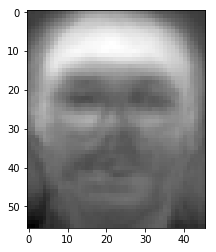

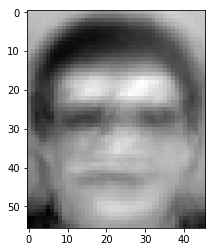

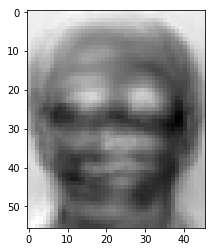

In [65]:
for i in range(3):
    plt.imshow(eigenFaces[i],cmap='gray')
    plt.show()
    #plt.savefig('No{}_eigenface'.format(i+1), bbox_inches='tight')

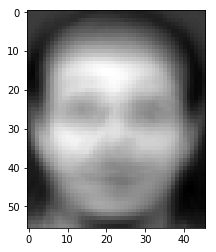

In [66]:
averageFace = mean.reshape((56, 46))
plt.imshow(averageFace,cmap='gray')
plt.show()
#plt.savefig('meanface', bbox_inches='tight')

C:\Users\Gary\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


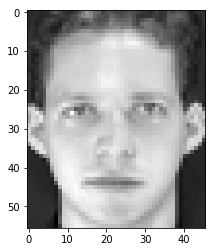

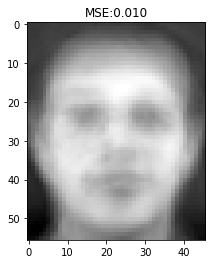

In [67]:
# Reshape image to one long vector and subtract the mean vector
im = np.array(imread("hw1_dataset/1_1.PNG", True).flatten()/255)
plt.imshow(im.reshape((56, 46)),cmap='gray')
plt.show()
imVector = im - mean

output = averageFace
Numeigenface=3
for i in range(0,Numeigenface):
    '''
    The weight is the dot product of the mean subtracted
    image vector with the EigenVector
    '''
    weight = np.dot(imVector, eigenVectors[i])
    output = output + eigenFaces[i] * weight
    
mse = ((im.reshape(56, 46) - output) ** 2).mean(axis=None)
plt.title("MSE:%.3f"%mse)

plt.imshow(output,cmap='gray')
plt.show()
#plt.savefig('{}eigenface'.format(Numeigenface), bbox_inches='tight')

In [68]:
print(training_labels[:20])

['10', '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '11', '12', '12', '12', '12', '12', '12', '13', '13']


In [69]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


In [101]:
n_components=[3,50,159]
n_neighbors=[1,3,5]

for i in n_components:
    pca = PCA(n_components=i)
    pca.fit(training_data)
    x_training=pca.transform(training_data)
    x_training, training_labels2 = shuffle(x_training, training_labels, random_state=0)
    

    for j in n_neighbors:
        neigh = KNeighborsClassifier(n_neighbors=j)
        print ('(n_components: {}, n_neighbors: {} || val_score: {})'.format(i, j, cross_val_score(neigh, x_training, training_labels2, cv=3).mean()))


(n_components: 3, n_neighbors: 1 || val_score: 0.7208333333333333)
(n_components: 3, n_neighbors: 3 || val_score: 0.6166666666666666)
(n_components: 3, n_neighbors: 5 || val_score: 0.55)
(n_components: 50, n_neighbors: 1 || val_score: 0.9333333333333332)
(n_components: 50, n_neighbors: 3 || val_score: 0.8583333333333334)
(n_components: 50, n_neighbors: 5 || val_score: 0.775)
(n_components: 159, n_neighbors: 1 || val_score: 0.9416666666666668)
(n_components: 159, n_neighbors: 3 || val_score: 0.8291666666666666)
(n_components: 159, n_neighbors: 5 || val_score: 0.7583333333333333)


In [100]:
n_components=159 #{3,50,159}
n_neighbors=1 #{1,3,5}

pca = PCA(n_components=n_components)
pca.fit(training_data)
x_training=pca.transform(training_data)
x_testing=pca.transform(testing_data)
x_training, training_labels2 = shuffle(x_training, training_labels, random_state=0)
x_testing, testing_labels2 = shuffle(x_testing, testing_labels, random_state=0)

neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
neigh.fit(x_training, training_labels2)
result = neigh.predict(x_testing)

print(accuracy_score(testing_labels2, result))

0.94375


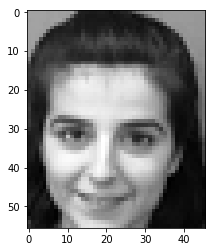

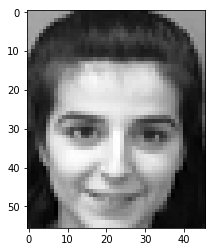

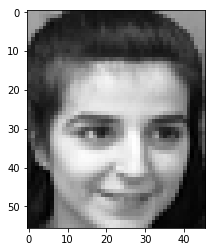

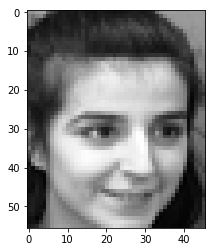

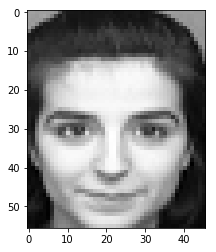

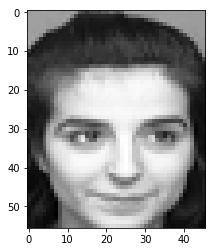

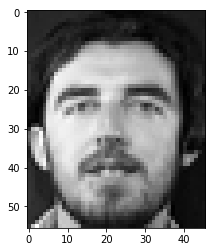

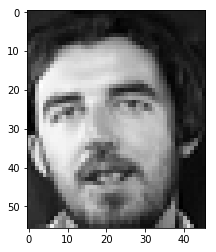

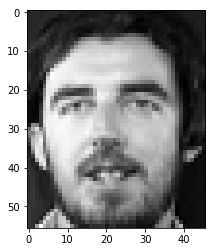

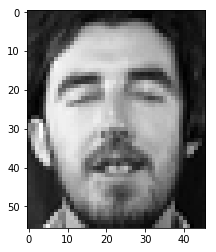

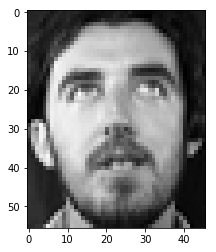

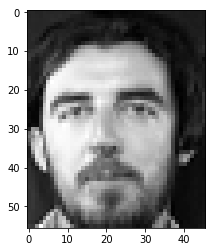

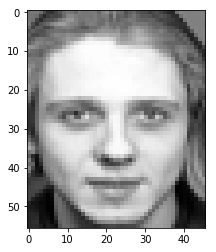

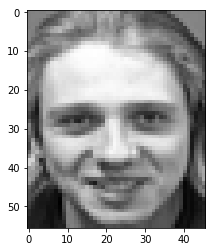

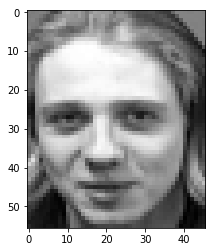

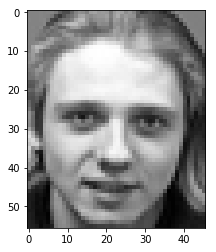

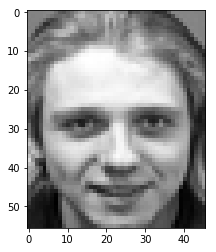

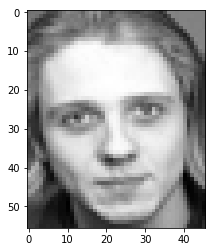

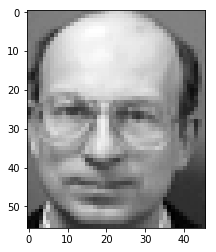

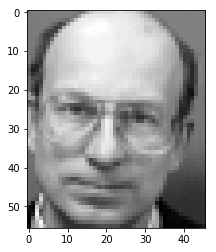

In [72]:
for i in range(20):
    plt.imshow(training_data[i].reshape((56, 46)),cmap='gray')
    plt.show() 